In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import os

In [2]:
#Read the csv file
austin_df = pd.read_csv('austin_311_service_requests.csv',low_memory=False)

#Create a df with the approriate columns that we need.
austin_df = austin_df[["city", "county", "incident_zip", "created_date", "owning_department", "complaint_description", "complaint_type"]]

#Clean up the columns and put them in order.
austin_df = austin_df.rename(columns={"city":"City", "county":"County","incident_zip":"Incident Zip",
                                      "created_date":"Date", "owning_department":"Department",
                                      "complaint_description":"Complaint Description","complaint_type":"Type of Complaint"})
austin_df.head(10)

,City,County,Incident Zip,Date,Department,Complaint Description,Type of Complaint
0,AUSTIN,TRAVIS,78741.0,2015-01-20 10:41:48,Animal Services Office,Loose Dog,ACLONAG
1,AUSTIN,TRAVIS,78757.0,2016-05-22 10:00:49,Animal Services Office,Loose Dog,ACLONAG
2,AUSTIN,TRAVIS,78744.0,2014-01-06 18:04:00,Animal Services Office,Loose Animal (not dog),ACLOANIM
3,AUSTIN,TRAVIS,78727.0,2014-11-15 15:43:41,Austin Code Department,Austin Code - Request Code Officer,CODECOMP
4,AUSTIN,TRAVIS,78723.0,2014-07-28 17:33:00,Animal Services Office,Animal - Proper Care,ACPROPER
5,AUSTIN,TRAVIS,78702.0,2016-06-20 16:44:00,Animal Services Office,Animal - Proper Care,ACPROPER
6,AUSTIN,TRAVIS,78744.0,2015-08-25 11:03:04,Austin Code Department,Austin Code - Request Code Officer,CODECOMP
7,AUSTIN,TRAVIS,78749.0,2014-08-26 13:01:00,Austin Water Utility,Water Waste Report,WWREPORT
8,AUSTIN,TRAVIS,78702.0,2015-06-19 16:31:06,Parks & Recreation Department,Park Maintenance - Pool Issues,PRMTPOOL
9,AUSTIN,TRAVIS,78759.0,2017-08-01 12:55:03,Austin Code Department,Austin Code - Request Code Officer,CODECOMP


In [3]:
#Replace the empty rows with 'NaN'.
austin_df.replace('', np.nan, inplace=True)

#Drop rows with 'NaN'.
cleanaustin_df = austin_df.dropna(how="any")

In [4]:
cleanaustin_df.head(15)

,City,County,Incident Zip,Date,Department,Complaint Description,Type of Complaint
0,AUSTIN,TRAVIS,78741.0,2015-01-20 10:41:48,Animal Services Office,Loose Dog,ACLONAG
1,AUSTIN,TRAVIS,78757.0,2016-05-22 10:00:49,Animal Services Office,Loose Dog,ACLONAG
2,AUSTIN,TRAVIS,78744.0,2014-01-06 18:04:00,Animal Services Office,Loose Animal (not dog),ACLOANIM
3,AUSTIN,TRAVIS,78727.0,2014-11-15 15:43:41,Austin Code Department,Austin Code - Request Code Officer,CODECOMP
4,AUSTIN,TRAVIS,78723.0,2014-07-28 17:33:00,Animal Services Office,Animal - Proper Care,ACPROPER
5,AUSTIN,TRAVIS,78702.0,2016-06-20 16:44:00,Animal Services Office,Animal - Proper Care,ACPROPER
6,AUSTIN,TRAVIS,78744.0,2015-08-25 11:03:04,Austin Code Department,Austin Code - Request Code Officer,CODECOMP
7,AUSTIN,TRAVIS,78749.0,2014-08-26 13:01:00,Austin Water Utility,Water Waste Report,WWREPORT
8,AUSTIN,TRAVIS,78702.0,2015-06-19 16:31:06,Parks & Recreation Department,Park Maintenance - Pool Issues,PRMTPOOL
9,AUSTIN,TRAVIS,78759.0,2017-08-01 12:55:03,Austin Code Department,Austin Code - Request Code Officer,CODECOMP


In [5]:
#Get rid of cities that aren't in Austin.
value_list = ['AUSTIN', 'Austin', 'austin']
austincity_df = cleanaustin_df[cleanaustin_df.City.isin(value_list)]

#Keep cities that are 'Austin' only in Travis county.
value_list = ['TRAVIS']
austin311_df = austincity_df[austincity_df.County.isin(value_list)]

In [6]:
austin311_df.count()

City                     422852
County                   422852
Incident Zip             422852
Date                     422852
Department               422852
Complaint Description    422852
Type of Complaint        422852
dtype: int64

In [7]:
# Change the zip to an integer
austin311_df["Incident Zip"] = austin311_df["Incident Zip"].astype(int)

#Drop the City and County
austin311_df.drop('City',axis=1, inplace=True)
austin311_df.drop('County',axis=1, inplace=True)

#Change the date to a datetime format.
austin311_df['Date'] = pd.to_datetime(austin311_df['Date'], format='%Y/%m/%d')

#Create columns for year and month. 
austin311_df['Year'] = austin311_df['Date'].dt.year
austin311_df['Month'] = austin311_df['Date'].dt.month
#austin311_df['Month'] = austin311_df['Date'].dt.strftime("%B") for adding the text for month.
austin311_df.head()

/Users/tom/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/tom/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/tom/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/tom/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:

,Incident Zip,Date,Department,Complaint Description,Type of Complaint,Year,Month
0,78741,2015-01-20 10:41:48,Animal Services Office,Loose Dog,ACLONAG,2015,1
1,78757,2016-05-22 10:00:49,Animal Services Office,Loose Dog,ACLONAG,2016,5
2,78744,2014-01-06 18:04:00,Animal Services Office,Loose Animal (not dog),ACLOANIM,2014,1
3,78727,2014-11-15 15:43:41,Austin Code Department,Austin Code - Request Code Officer,CODECOMP,2014,11
4,78723,2014-07-28 17:33:00,Animal Services Office,Animal - Proper Care,ACPROPER,2014,7


In [8]:
#Save the file as a .csv
#austin311_df.to_csv('austin311_df.csv', encoding='utf-8', index=False)

In [9]:
#Drop the Type of Complaint, Complaint Description, and Date.
new_austin311_df = austin311_df.drop(["Date","Complaint Description","Type of Complaint", "Incident Zip"], axis=1)
new_austin311_df.head()

,Department,Year,Month
0,Animal Services Office,2015,1
1,Animal Services Office,2016,5
2,Animal Services Office,2014,1
3,Austin Code Department,2014,11
4,Animal Services Office,2014,7


In [10]:
#Pivot the table to make 'Year' the index and get the counts for Department and Zip.
austin311_year = new_austin311_df.pivot_table(new_austin311_df, index=['Year','Month'], aggfunc='count')
austin311_year = austin311_year.rename(columns={"Department":"Number of Complaints"})
austin311_year.head()

Number of Complaints
Year Month                      
2013 12                       44
2014 1                      8192
     2                      7466
     3                      9253
     4                     10751

In [11]:
#Drop the year 2013 since it has only one month.
austin311_year.drop(austin311_year.index[0],inplace=True)
austin311_year.drop(austin311_year.index[36:],inplace=True)
austin311_year

Number of Complaints
Year Month                      
2014 1                      8192
     2                      7466
     3                      9253
     4                     10751
     5                     10124
     6                     11943
     7                     11593
     8                     11625
     9                     11651
     10                    10955
     11                     8407
     12                     8417
2015 1                      8357
     2                      7745
     3                      9929
     4                     11022
     5                     13462
     6                     14552
     7                     12991
     8                     11767
     9                     10779
     10                    11488
     11                     9273
     12                     8008
2016 1                      8379
     2                      8072
     3                      9618
     4                     10702
     5                     11843
     6                     10828
     7                      9082
     8                     11141
     9                     11616
     10                     9749
     11                     8387
     12                     7658

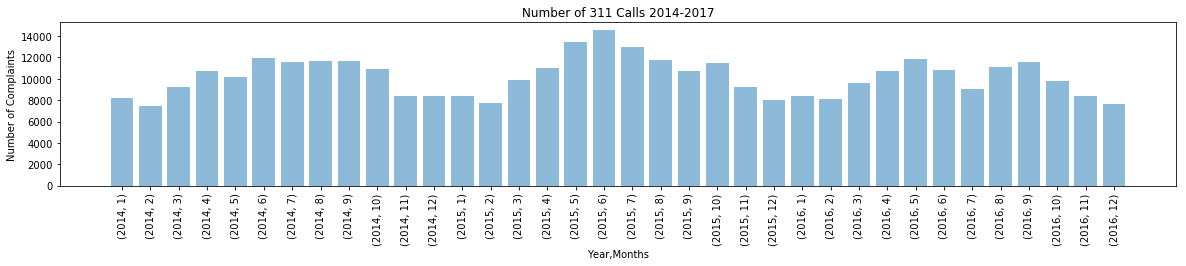

In [12]:
plt.figure(figsize=(20,3))
x_axis = np.arange(len(austin311_year.index))
tick_locations = [value + 0.4 for value in x_axis]
plt.xticks(tick_locations, austin311_year.index, rotation="vertical")

plt.bar(x_axis, austin311_year["Number of Complaints"], alpha=0.5, align="edge")

plt.xlabel("Year,Months")
plt.ylabel("Number of Complaints")
plt.title("Number of 311 Calls 2014-2017")

plt.show()

In [13]:
#Pivot the df so 'Month' is the index 
austin311_month = austin311_year.pivot_table('Number of Complaints', ['Month'],'Year' )
austin311_month

Year,2014,2015,2016
Month,,,
1,8192,8357,8379
2,7466,7745,8072
3,9253,9929,9618
4,10751,11022,10702
5,10124,13462,11843
6,11943,14552,10828
7,11593,12991,9082
8,11625,11767,11141
9,11651,10779,11616


In [14]:
#Reset the index to save to .cvs file.
austin311_reset = austin311_month.reset_index()
austin311_reset

Year,Month,2014,2015,2016
0,1,8192,8357,8379
1,2,7466,7745,8072
2,3,9253,9929,9618
3,4,10751,11022,10702
4,5,10124,13462,11843
5,6,11943,14552,10828
6,7,11593,12991,9082
7,8,11625,11767,11141
8,9,11651,10779,11616
9,10,10955,11488,9749


In [15]:
#Save the file as a .csv
austin311_reset.to_csv('austin311_year_month.csv', encoding='utf-8', index=False)

In [16]:
years = austin311_month.keys()
years

Int64Index([2014, 2015, 2016], dtype='int64', name='Year')

In [17]:
plot = austin311_month.plot(kind='line')
plt.xticks(austin311_month.index)

plt.xlabel("Months")
plt.ylabel("Number of Complaints")
plt.title("Number of 311 Calls 2014-2017")
plt.legend(bbox_to_anchor=(1.05,1),loc= 2, borderaxespad = 0.,title="Year")

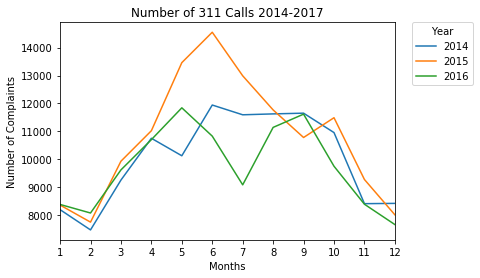

In [18]:
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('Number_311_calls.png', bbox_inches='tight', dpi=200)